# **Proyecto: API de Análisis de Sentimientos**

##  **Descripción del Proyecto**
Crear una **API simple** que recibe textos (comentarios, reseñas o tweets), aplica un **modelo de Data Science** para clasificar el sentimiento y devuelve el resultado en formato **JSON**, permitiendo que las aplicaciones consuman esta predicción automáticamente.

### **Opciones de Clasificación**
- **Binaria**: Positivo / Negativo
- **Ternaria**: Positivo / Neutro / Negativo

##  **Alcance Recomendado**
Clasificación con un **modelo simple** usando:
- **TF-IDF**: Técnica que transforma texto en números, mostrando qué palabras son más importantes
- **Regresión Logística**: Modelo de aprendizaje automático que aprende a diferenciar sentimientos

##  **Objetivos del Proyecto**

### **1.  Exploración y Limpieza de Datos (EDA)**
- Análisis exploratorio de los datos de texto
- Limpieza de datos: manejo de valores nulos, duplicados
- Preprocesamiento de texto: lowercasing, eliminación stopwords, etc.

### **2.  Transformación de Textos con TF-IDF**
- Convertir texto en representación numérica
- Creación de matriz de características
- Selección de características más relevantes

### **3.  Entrenamiento del Modelo Supervisado**
- **Opción A**: Regresión Logística
- **Opción B**: Naive Bayes
- **Opción C**: Support Vector Machines (SVM)
- División de datos: train/test split
- Validación cruzada

### **4.  Métricas de Desempeño**
- **Accuracy**: Precisión general del modelo
- **Precision**: Exactitud en predicciones positivas
- **Recall**: Capacidad de encontrar todos los positivos
- **F1-Score**: Balance entre Precision y Recall
- Matriz de confusión

### **5.  Serialización del Modelo**
- Guardar modelo entrenado con `joblib` o `pickle`
- Guardar vectorizador TF-IDF
- Crear pipeline completo
- Versionado de modelos


### Aqui irian todos los **IMPORTS NECESARIOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#imports l impieza de datos
import re       #para reemplazar patrones en textos
import nltk      #para procesar lenguaje
from nltk.corpus import stopwords # para las palabras vacias ej: "el" ,"la" , "y"



In [ ]:
# Configurar visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
print("Librerias cargadas correctamente")

Librerias cargadas correctamente


# Lectura del DataSet

In [ ]:
#Para instalar la version actual de datasets
!pip install datasets -q

In [ ]:
#unificando los csv's
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_valid = pd.read_csv('valid.csv')

print("Archivos cargados:")
print(f" • train.csv: {df_train.shape[0]} filas")
print(f" • test.csv: {df_test.shape[0]} filas")
print(f" • valid.csv: {df_valid.shape[0]} filas")

df = pd.concat([df_train, df_test, df_valid], ignore_index=True)
print(f"\n Dataset unificado: {df.shape[0]} filas × {df.shape[1]} columnas")

print("Dataset cargado exitosamente!")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

print("Primeras 20 filas:")
print(df.head(20))
print("\n" + "="*50 + "\n")

print("Informacion basica:")
print(f"Columnas: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores nulos por columna:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("3 filas aleatorias:")
print(df.sample(3, random_state=42));

Archivos cargados:
 • train.csv: 1839 filas
 • test.csv: 870 filas
 • valid.csv: 324 filas

 Dataset unificado: 3033 filas × 3 columnas
Dataset cargado exitosamente!
Dimensiones: 3033 filas × 3 columnas

Primeras 20 filas:
                                                 text     label  \
0   estoy hasta el ojete de que me digáis que teng...  negative   
1   @user Por?  Tenía pensado verla después de la ...   neutral   
2                            Esto de estar feliz mola  positive   
3                              Ya no es tan divertido  negative   
4   @user te recuerdo que soy una persona que tien...   neutral   
5   @user @user @user con una pequeña donación har...  positive   
6   He probado una nueva espuma para el pelo y sí ...  negative   
7   @user Ojalá pudiera darte el abrazo en vivo o ...   neutral   
8   @user aquí tienes a mi bae aka una egipcia pre...  positive   
9                      @user ya somos dos, que triste  negative   
10  JUAS ahora dicen que la paja se la v

[-3.69794850e-01  3.73496806e-01 -1.27315882e+00 -1.82007023e+00
  9.12454288e-01 -9.70846116e-01 -8.10923820e-01 -7.87556647e-02
 -7.31801871e-02 -9.25123549e-01 -1.95522718e-01 -2.61265576e-01
  7.13032993e-01  1.71257928e-01 -8.67457746e-01  3.96192751e-01
  7.61614875e-01  2.32397412e-01 -6.57163778e-02 -5.82052382e-01
 -5.19811182e-01  1.36708924e-01  1.93668108e+00 -1.35528583e+00
 -3.59949517e-01  1.55937913e+00 -5.80684120e-01  1.93933474e+00
 -2.33249121e-01 -2.67306628e-01 -4.18345082e-01  1.20074465e+00
  3.01822856e-01 -1.16127431e+00 -7.95890109e-01 -9.18882292e-01
  5.56425501e-02 -6.89995561e-01  1.86209483e+00  1.12806750e+00
  2.61734824e-01 -1.06428294e+00 -3.64184935e-01 -4.78103008e-01
 -9.68884634e-02  6.28016337e-01  9.72516179e-02 -2.41879725e-01
  1.32420880e-01  3.82939952e-01  5.54315236e-01  9.81556085e-01
  4.88420444e-01  3.63446917e-01 -1.05488405e+00 -1.00276066e+00
  2.34787514e+00 -1.01437355e+00  1.24262035e+00 -2.10471365e+00
 -6.74396730e-01 -1.61342

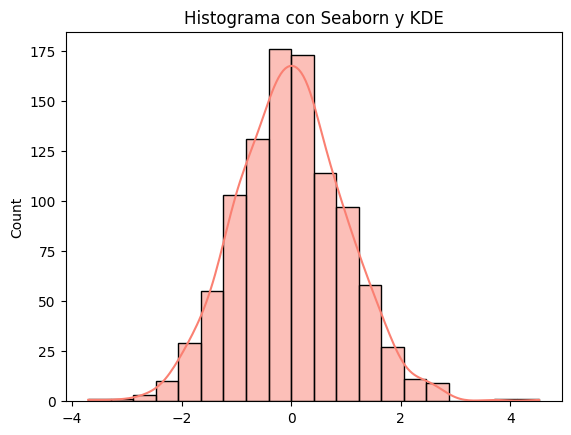

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datos =
sns.histplot(datos, kde=True, bins=20, color='salmon') # kde=True para la curva
plt.title('Histograma con Seaborn y KDE')
plt.show()



In [ ]:
#unificando los csv's
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_valid = pd.read_csv('valid.csv')

print("Archivos cargados:")
print(f" • train.csv: {df_train.shape[0]} filas")
print(f" • test.csv: {df_test.shape[0]} filas")
print(f" • valid.csv: {df_valid.shape[0]} filas")

df = pd.concat([df_train, df_test, df_valid], ignore_index=True)
print(f"\n Dataset unificado: {df.shape[0]} filas × {df.shape[1]} columnas")

print("Dataset cargado exitosamente!")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

print("Primeras 20 filas:")
print(df.head(20))
print("\n" + "="*50 + "\n")

print("Informacion basica:")
print(f"Columnas: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores nulos por columna:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("3 filas aleatorias:")
print(df.sample(3, random_state=42));

Archivos cargados:
 • train.csv: 1839 filas
 • test.csv: 870 filas
 • valid.csv: 324 filas

 Dataset unificado: 3033 filas × 3 columnas
Dataset cargado exitosamente!
Dimensiones: 3033 filas × 3 columnas

Primeras 20 filas:
                                                 text     label  \
0   estoy hasta el ojete de que me digáis que teng...  negative   
1   @user Por?  Tenía pensado verla después de la ...   neutral   
2                            Esto de estar feliz mola  positive   
3                              Ya no es tan divertido  negative   
4   @user te recuerdo que soy una persona que tien...   neutral   
5   @user @user @user con una pequeña donación har...  positive   
6   He probado una nueva espuma para el pelo y sí ...  negative   
7   @user Ojalá pudiera darte el abrazo en vivo o ...   neutral   
8   @user aquí tienes a mi bae aka una egipcia pre...  positive   
9                      @user ya somos dos, que triste  negative   
10  JUAS ahora dicen que la paja se la v

In [ ]:
df.head()

,text,label,source
0,estoy hasta el ojete de que me digáis que teng...,negative,intertass_2017
1,@user Por? Tenía pensado verla después de la ...,neutral,intertass_2017
2,Esto de estar feliz mola,positive,intertass_2017
3,Ya no es tan divertido,negative,intertass_2017
4,@user te recuerdo que soy una persona que tien...,neutral,intertass_2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3033 non-null   object
 1   label   3033 non-null   object
 2   source  3033 non-null   object
dtypes: object(3)
memory usage: 71.2+ KB


# Histograma de comportamiento de los sentimientos

# Limpieza de datos

In [ ]:
nltk.download('stopwords') #descarga la lista de palabras vacias por sesion(una vez)

def limpiar_texto(texto):
  texto = str(texto).lower()
  texto = re.sub(r'[^a-záéíóúüñ\s]', ' ', texto) #para eliminar caracteres especiales
  palabras = texto.split()
  palabras = [p for p in palabras if p not in stopwords.words('spanish')]
  return ' '.join(palabras)

df['texto_limpio'] = df['text'].apply(limpiar_texto)
print("textos limpiados")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


textos limpiados


In [ ]:
for i in range(min(5, len(df))):
  original= df.iloc[i]['text']
  limpio = df.iloc[i]['texto_limpio']

  print(f" Original: {str(original)[:100]}")
  print(f" Limpio: {limpio[:100]}" if len(limpio) > 100 else f" Limpio: {limpio}")
  print(f" longitud: {len(str(original))} -> {len(limpio)} caracteres")
  print(f" Palabras {len(str(original).split())} -> {len(limpio.split())} palabras")

 Original: estoy hasta el ojete de que me digáis que tengo cara de mala leche
 Limpio: ojete digáis cara mala leche
 longitud: 66 -> 28 caracteres
 Palabras 14 -> 5 palabras
 Original: @user Por?  Tenía pensado verla después de la segunda de Daredevil
 Limpio: user pensado verla después segunda daredevil
 longitud: 66 -> 44 caracteres
 Palabras 11 -> 6 palabras
 Original: Esto de estar feliz mola
 Limpio: feliz mola
 longitud: 24 -> 10 caracteres
 Palabras 5 -> 2 palabras
 Original: Ya no es tan divertido
 Limpio: tan divertido
 longitud: 22 -> 13 caracteres
 Palabras 5 -> 2 palabras
 Original: @user te recuerdo que soy una persona que tiene criterio, equivocado, pero lo tengo
 Limpio: user recuerdo persona criterio equivocado
 longitud: 83 -> 41 caracteres
 Palabras 14 -> 5 palabras


# Entrenamiento

In [ ]:
# df['text'].apply(getStemmedReview) # The 'getStemmedReview' function is not yet defined, and the column name was incorrect.
from sklearn.model_selection import train_test_split

# Assuming 'text' is the feature and 'label' is the target
X = df['text'].values
y = df['label'].values

# Perform a train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

KeyError: 'review_es'

# Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8',
 decode_error='ignore')
vectorizer.fit(X_train)
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

# Regresión Logística

# Matriz de confusión (Conjunto Entrenamiento)

In [ ]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

# Graficar la matriz de confusión (Conjunto Entrenamiento)

# Matriz de confusión (Conjunto Prueba)

# Vectorización del vocabulario

# Verificar que palabras estan más hacia positivo o negativo

# Palabras más positivas

# Palabras más negativas

# Prueba

In [ ]:
prueba = ["Es irrespetuoso y crítico sin ofrecer soluciones constructivas",
          "Toma desiciones que parece beneficiar solo sus  propios intereses",
          "La evaluación fue satisfactoria, y el evaluador demostró un rendimiento óptimo",
          "El evaluador respondio adecuadamente mis dudas"]

# Transformar la entrada con el vectorizador

In [ ]:
x = vectorizer.transform(prueba)

In [ ]:
# Predecir con el modelo
P = model.predict(x)

In [ ]:
# Obtener las clases del modelo (0 => N, 1 => P)
clases = model.classes_

# Mensaje de salida

In [ ]:
for i in range (len(prueba)):
    if clases[P[i]] < 0:
        print(f"El Comentario: '{prueba[i]}' es: Negativo")
    elif clases[P[i]] == 0:
        print(f"El Comentario: '{prueba[i]}' es: Neutro")
    else:
        print(f"El Comentario: '{prueba[i]}' es: Neutro")

# # Encapsulamiento del modelo


In [ ]:
import joblib
joblib.dump(model,'model_es.pkl')
joblib.dump(vectorizer,'vectorizer_es.pkl')
joblib.dump(en_stopwords,'stopwords.pkl')